<div class="">
<br><br>
<center><br><font size="12"><font face="calibri"><strong>Machine Learning
<center><br><font size="5"><font face="calibri"><strong>Breast Cancer Prediction Using Artificial Neural Network
<br><br>
<br><strong>Oleh :
<br>
<br><strong>RIA ESAFRI
<br><strong>09011181722016
<br><br>
<br><strong>Mata Kuliah Kecerdasan Buatan
<br>
<br><strong>Dosen Pengampuh : 
<br><strong>Prof. Dr. Ir. Siti Nurmaini, M.T.
<br><br><br>
<br><strong>Jurusan Sistem Komputer
<br><strong>Fakultas Ilmu Komputer
<br><strong>Universitas Sriwijaya
<br><strong>2019

#### Pendahuluan 
Pada kasus breast cancer ini memiliki :
1. feature / input = 30 
2. class / output = 2  
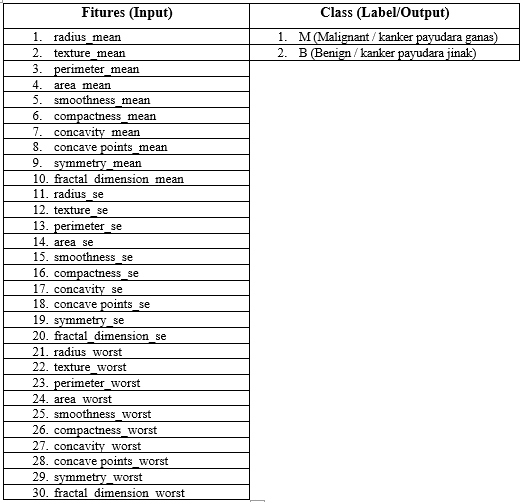
<br>
dataset : https://archive.ics.uci.edu/ml/datasets/Breast+Cancer+Wisconsin+(Diagnostic)

In [1]:
#Memanggil Library yang diperlukan
import numpy as np
import matplotlib.pyplot as plt 
from keras.optimizers import Adam
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.activations import relu
import pandas as pd
import sklearn
import keras
from keras.utils import to_categorical
from sklearn.metrics import confusion_matrix

C:\Users\RIA ESAFRI\Anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


## Membaca Data
Petama kita panggil data yang kita akan gunakan, dengan menggunakan fungsi pandas dan saya masukkan ke variabel  dataset.

In [2]:
dataset = pd.read_csv("C:/Users/RIA ESAFRI/Machine Learning/UAS/dataset/breast_cancer.csv")

Memanggil 20 data pertama dari 569 data

In [3]:
dataset.head(21)

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.26540,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.18600,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.24300,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.25750,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.16250,0.2364,0.07678,NaN
5,843786,M,12.45,15.70,82.57,477.1,0.12780,0.17000,0.15780,0.08089,...,23.75,103.40,741.6,0.1791,0.5249,0.5355,0.17410,0.3985,0.12440,NaN
6,844359,M,18.25,19.98,119.60,1040.0,0.09463,0.10900,0.11270,0.07400,...,27.66,153.20,1606.0,0.1442,0.2576,0.3784,0.19320,0.3063,0.08368,NaN
7,84458202,M,13.71,20.83,90.20,577.9,0.11890,0.16450,0.09366,0.05985,...,28.14,110.60,897.0,0.1654,0.3682,0.2678,0.15560,0.3196,0.11510,NaN
8,844981,M,13.00,21.82,87.50,519.8,0.12730,0.19320,0.18590,0.09353,...,30.73,106.20,739.3,0.1703,0.5401,0.5390,0.20600,0.4378,0.10720,NaN
9,84501001,M,12.46,24.04,83.97,475.9,0.11860,0.23960,0.22730,0.08543,...,40.68,97.65,711.4,0.1853,1.0580,1.1050,0.22100,0.4366,0.20750,NaN


Memasukkan feature kedalam variabel fitur dan class kedalam variabel label, pada fitur saya masukkan dari kolom ke 2 sampai -1, label saya ambil kolom 1, artinya kolom pertama dan terakhir tidak saya ambil sebagai fitur maupun label, karena bukan termasuk fitur ataupun label.

In [4]:
fitur = dataset.iloc[:, 2:-1].values
label = dataset.iloc[:, 1].values

Mengubah nilai class/label menjadi nilai binary (0 dan 1)

In [5]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
labelencoder_label = LabelEncoder()
label = labelencoder_label.fit_transform(label)

## Spliting data
Selanjutnya kita bagi data fitur dan label kedalam training dan testing dalam pembagian sbb :
1. training = 80 %
2. testing = 0.2 = 20 %
<br>
<br>
dengan tingkat acak (random_state = 20)

In [6]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(fitur, label, test_size=0.2, random_state=42)
y_test

array([0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0,
       1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0,
       1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0,
       1, 0, 0, 1], dtype=int64)

## Preprocessing
Pada proses preprocessing ini, kita akan memproses nilai data input atau fitur kedalam jarak atau perbandingan yang berdekatan, supaya hasil training bisa maksimal, banyak metode dalam process preprocessing ini, kali ini akan menggunkan metode MinMaxScaler. 

In [7]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [8]:
# One hot encode target values
one_hot = OneHotEncoder()
y_train = one_hot.fit_transform(y_train.reshape(-1, 1)).todense()
y_test = one_hot.transform(y_test.reshape(-1, 1)).todense()

## Model ANN
1. Input layer = 30 (activation = relu)
2. Hidden Layer = 50 (activation = relu)
3. Output layer = 2 (binary, activation = sigmoid)
<br>
<br>
Dapat digambarkan sebagai berikut : 
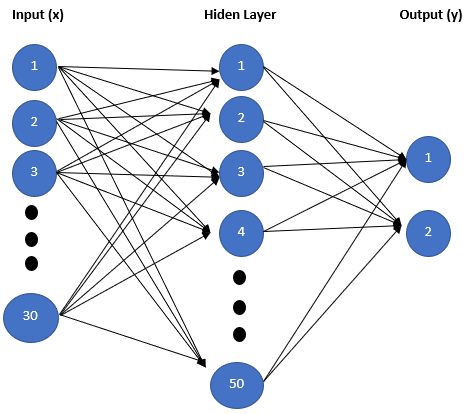

In [9]:
model = Sequential()
model.add(Dense(units=50, input_dim = 30, activation='relu'))
model.add(Dense(units= 2, activation='sigmoid'))

## Compile Model

Model Dicompile dengan Optimizer = adam, dengan fungsi loss = Binary Crossentropy

In [10]:
from keras.optimizers import Adam
model.compile(optimizer=Adam(lr=0.001), loss='binary_crossentropy', metrics=['accuracy'])

## Men-Training model dengan data train

In [11]:
#Proses training
training = model.fit(X_train, y_train, validation_data=(X_test, y_test), batch_size=32, 
                         epochs=100)

Train on 455 samples, validate on 114 samples
Epoch 1/100
455/455 [==============================] - 0s 412us/step - loss: 0.6799 - accuracy: 0.5912 - val_loss: 0.6509 - val_accuracy: 0.8289
Epoch 2/100
455/455 [==============================] - 0s 121us/step - loss: 0.6362 - accuracy: 0.8473 - val_loss: 0.6018 - val_accuracy: 0.9123
Epoch 3/100
455/455 [==============================] - 0s 101us/step - loss: 0.5934 - accuracy: 0.8670 - val_loss: 0.5587 - val_accuracy: 0.9079
Epoch 4/100
455/455 [==============================] - 0s 156us/step - loss: 0.5561 - accuracy: 0.8813 - val_loss: 0.5191 - val_accuracy: 0.9123
Epoch 5/100
455/455 [==============================] - 0s 100us/step - loss: 0.5181 - accuracy: 0.8791 - val_loss: 0.4791 - val_accuracy: 0.9254
Epoch 6/100
455/455 [==============================] - 0s 142us/step - loss: 0.4821 - accuracy: 0.8824 - val_loss: 0.4413 - val_accuracy: 0.9167
Epoch 7/100
455/455 [==============================] - 0s 112us/step - loss: 0.4478 

455/455 [==============================] - 0s 88us/step - loss: 0.0994 - accuracy: 0.9780 - val_loss: 0.0847 - val_accuracy: 0.9737
Epoch 58/100
455/455 [==============================] - 0s 94us/step - loss: 0.0985 - accuracy: 0.9780 - val_loss: 0.0829 - val_accuracy: 0.9781
Epoch 59/100
455/455 [==============================] - 0s 66us/step - loss: 0.0950 - accuracy: 0.9824 - val_loss: 0.0833 - val_accuracy: 0.9737
Epoch 60/100
455/455 [==============================] - 0s 70us/step - loss: 0.0943 - accuracy: 0.9813 - val_loss: 0.0822 - val_accuracy: 0.9737
Epoch 61/100
455/455 [==============================] - 0s 67us/step - loss: 0.0927 - accuracy: 0.9802 - val_loss: 0.0805 - val_accuracy: 0.9737
Epoch 62/100
455/455 [==============================] - 0s 79us/step - loss: 0.0946 - accuracy: 0.9736 - val_loss: 0.0799 - val_accuracy: 0.9737
Epoch 63/100
455/455 [==============================] - 0s 70us/step - loss: 0.0899 - accuracy: 0.9824 - val_loss: 0.0818 - val_accuracy: 0.973

## Menghitungan Akurasi

In [12]:
testing = model.evaluate(X_test, y_test)
testing

114/114 [==============================] - 0s 105us/step


[0.06631467399889962, 0.9824561476707458]

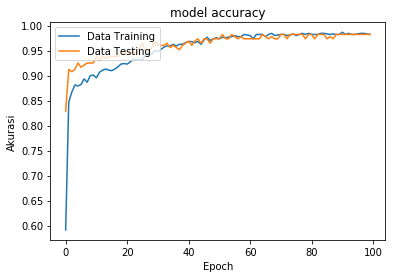

In [13]:
plt.plot(training.history['accuracy'])
plt.plot(training.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('Akurasi')
plt.xlabel('Epoch')
plt.legend(['Data Training', 'Data Testing'], loc='upper left')
plt.show()

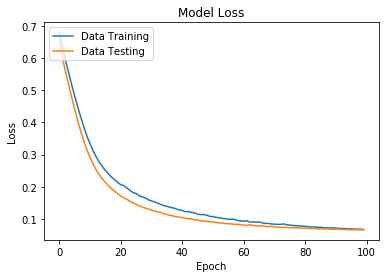

In [14]:
plt.plot(training.history['loss'])
plt.plot(training.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Data Training', 'Data Testing'], loc='upper left')
plt.show()

In [15]:
prediction_x = model.predict_classes(X_test)

In [16]:
#mengubah data y_test kedalam bentuk array
prediction_y = [np.argmax(t) for t in y_test]
prediction_y = np.array(prediction_y)

## Confusion Matrix

Konsep dari confusion matrix adalah sebagai berikut : <br>
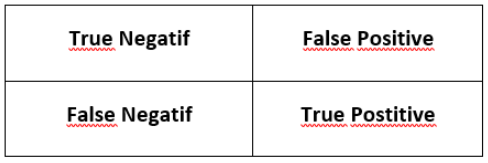

In [17]:
ConfusionMatrix = confusion_matrix(prediction_x, prediction_y)
cm = ConfusionMatrix
tp = cm[0,0]
tn = cm[1,1]
fp = cm[0,1]
fn = cm[1,0]
print("Confusion Matrix : \n", cm)

Confusion Matrix : 
 [[70  1]
 [ 1 42]]


## Evaluasi Model dengan Confusion Matrix
### 1.  Akurasi
Melalui confusion matrix, rumus dalam menghitung nilai akurasinya adalah sebagai berikut : 
<img src="2.PNG" />

In [18]:
akurasi = (tn+tp) / (tp+tn+fp+fn)
print("Hasil Akurasi = ", akurasi)

Hasil Akurasi =  0.9824561403508771


### 2.  Precision
Melalui confusion matrix, rumus dalam menghitung nilai precision adalah sebagai berikut : 
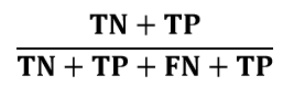

In [19]:
precision = tp / ( fp + tp)
print("Hasil Precision = ", precision)

Hasil Precision =  0.9859154929577465


### 3. Recall
Melalui confusion matrix, rumus dalam menghitung nilai recall adalah sebagai berikut :
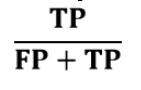

In [20]:
recall = tp/(fn+tp)
print("Hasil Recall = ",recall)

Hasil Recall =  0.9859154929577465


### 4. F1
Melalui confusion matrix, rumus dalam menghitung nilai recall adalah sebagai berikut : 
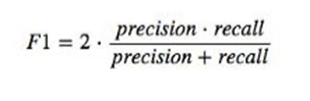

In [21]:
f1=(2*precision*recall)/(precision+recall)
print("Hasil F1 = ",f1)

Hasil F1 =  0.9859154929577465
